### Análise exploratória de dados de cargos e salários na área de dados.

Dataset disponível no [Kaggle](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data) 

O dataset apresentado oferece uma visão abrangente do mercado de trabalho na área de dados, cobrindo diversos aspectos como títulos de emprego, salários, níveis de experiência e localizações de empresas e funcionários. Com informações que abrangem vários anos, este conjunto de dados permite análises detalhadas de tendências de mercado, diferenças salariais em diferentes geografias e setores, e insights sobre os tipos de empregos disponíveis no campo de dados. É uma ferramenta valiosa tanto para profissionais que buscam entender melhor o mercado de trabalho quanto para empresas que desejam alinhar suas ofertas de emprego às tendências atuais do mercado.

| Nome da Coluna        | Função da Coluna                                              |
|-----------------------|---------------------------------------------------------------|
| work_year             | Ano em que os dados do emprego foram registrados              |
| job_title             | Título do emprego                                             |
| job_category          | Categoria do emprego                                          |
| salary_currency       | Moeda em que o salário é pago                                 |
| salary                | Salário bruto anual na moeda local                            |
| salary_in_usd         | Salário bruto anual convertido em dólares americanos          |
| employee_residence    | País de residência do empregado                               |
| experience_level      | Nível de experiência do empregado (ex: Junior, Senior)        |
| employment_type       | Tipo de emprego (ex: Tempo integral, Contrato)                |
| work_setting          | Configuração do local de trabalho (ex: Remoto, Escritório)    |
| company_location      | Localização da empresa                                        |
| company_size          | Tamanho da empresa (ex: Pequena, Média, Grande)               |


In [6]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Carregando o arquivo
file_path = '/Users/bentofh/Documents/GitHub/jobs_and_salaries_in_data_science/jobs_in_data.csv'
data = pd.read_csv(file_path)

In [5]:
data.head(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
# Análise descritiva dos dados numéricos
descriptive_analysis = data.describe()
descriptive_analysis

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


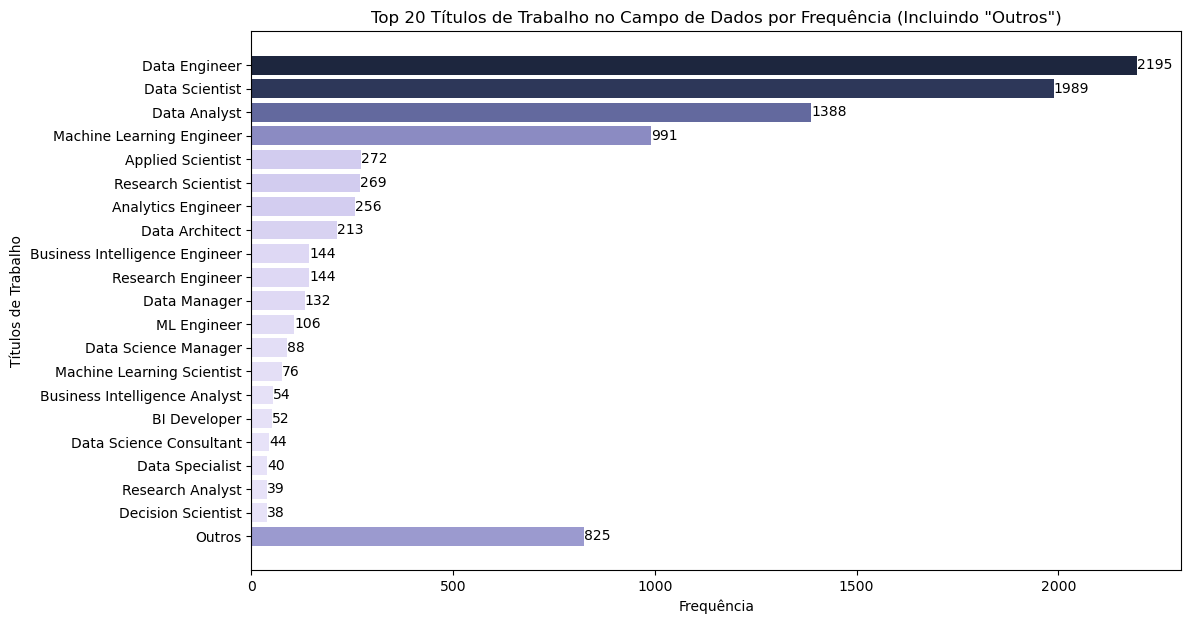

In [15]:
# Contagem de frequência dos títulos de trabalho
job_title_counts = data['job_title'].value_counts()

# Selecionando os 20 títulos de trabalho mais frequentes
top_job_titles = job_title_counts.head(20)

# Calculando a frequência total dos títulos de trabalho que não estão no top 20
job_titles_not_included = job_title_counts[~job_title_counts.index.isin(top_job_titles.index)]
frequencia_outros = job_titles_not_included.sum()

# Adicionando esta frequência em uma nova categoria chamada "Outros"
top_job_titles_with_others = pd.concat([top_job_titles, pd.Series({'Outros': frequencia_outros})])

# Criando um mapa de cores com tons de azul
cmap = sns.cubehelix_palette(start=2.8, rot=.1, light=0.9, n_colors=256, as_cmap=True)

# Normalizando os valores para o mapeamento de cores
norm = plt.Normalize(top_job_titles_with_others.min(), top_job_titles_with_others.max())

# Plotando o gráfico de barras horizontal
plt.figure(figsize=(12, 7))
bars = plt.barh(top_job_titles_with_others.index, top_job_titles_with_others.values, color=cmap(norm(top_job_titles_with_others.values)))

# Adicionando a legenda dentro das barras
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', 
             va='center')

plt.xlabel('Frequência')
plt.ylabel('Títulos de Trabalho')
plt.title('Top 20 Títulos de Trabalho no Campo de Dados por Frequência (Incluindo "Outros")')
plt.gca().invert_yaxis() # Inverter o eixo y para o maior valor ficar no topo
plt.show()

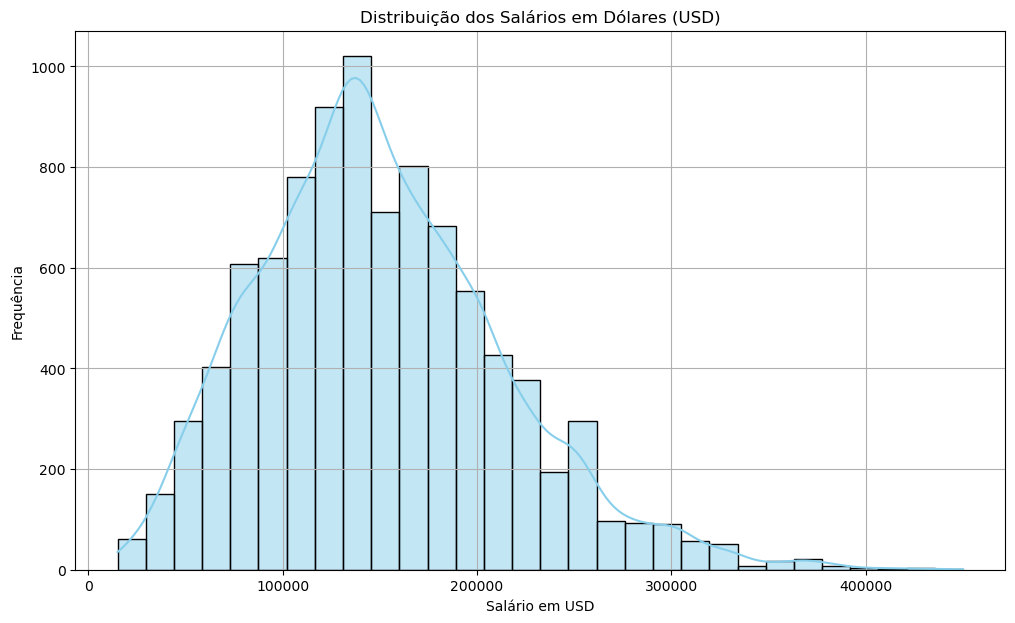

In [17]:
# Criando um histograma para a coluna 'salary_in_usd'

plt.figure(figsize=(12, 7))
sns.histplot(data['salary_in_usd'], bins=30, kde=True, color='skyblue')

plt.title('Distribuição dos Salários em Dólares (USD)')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


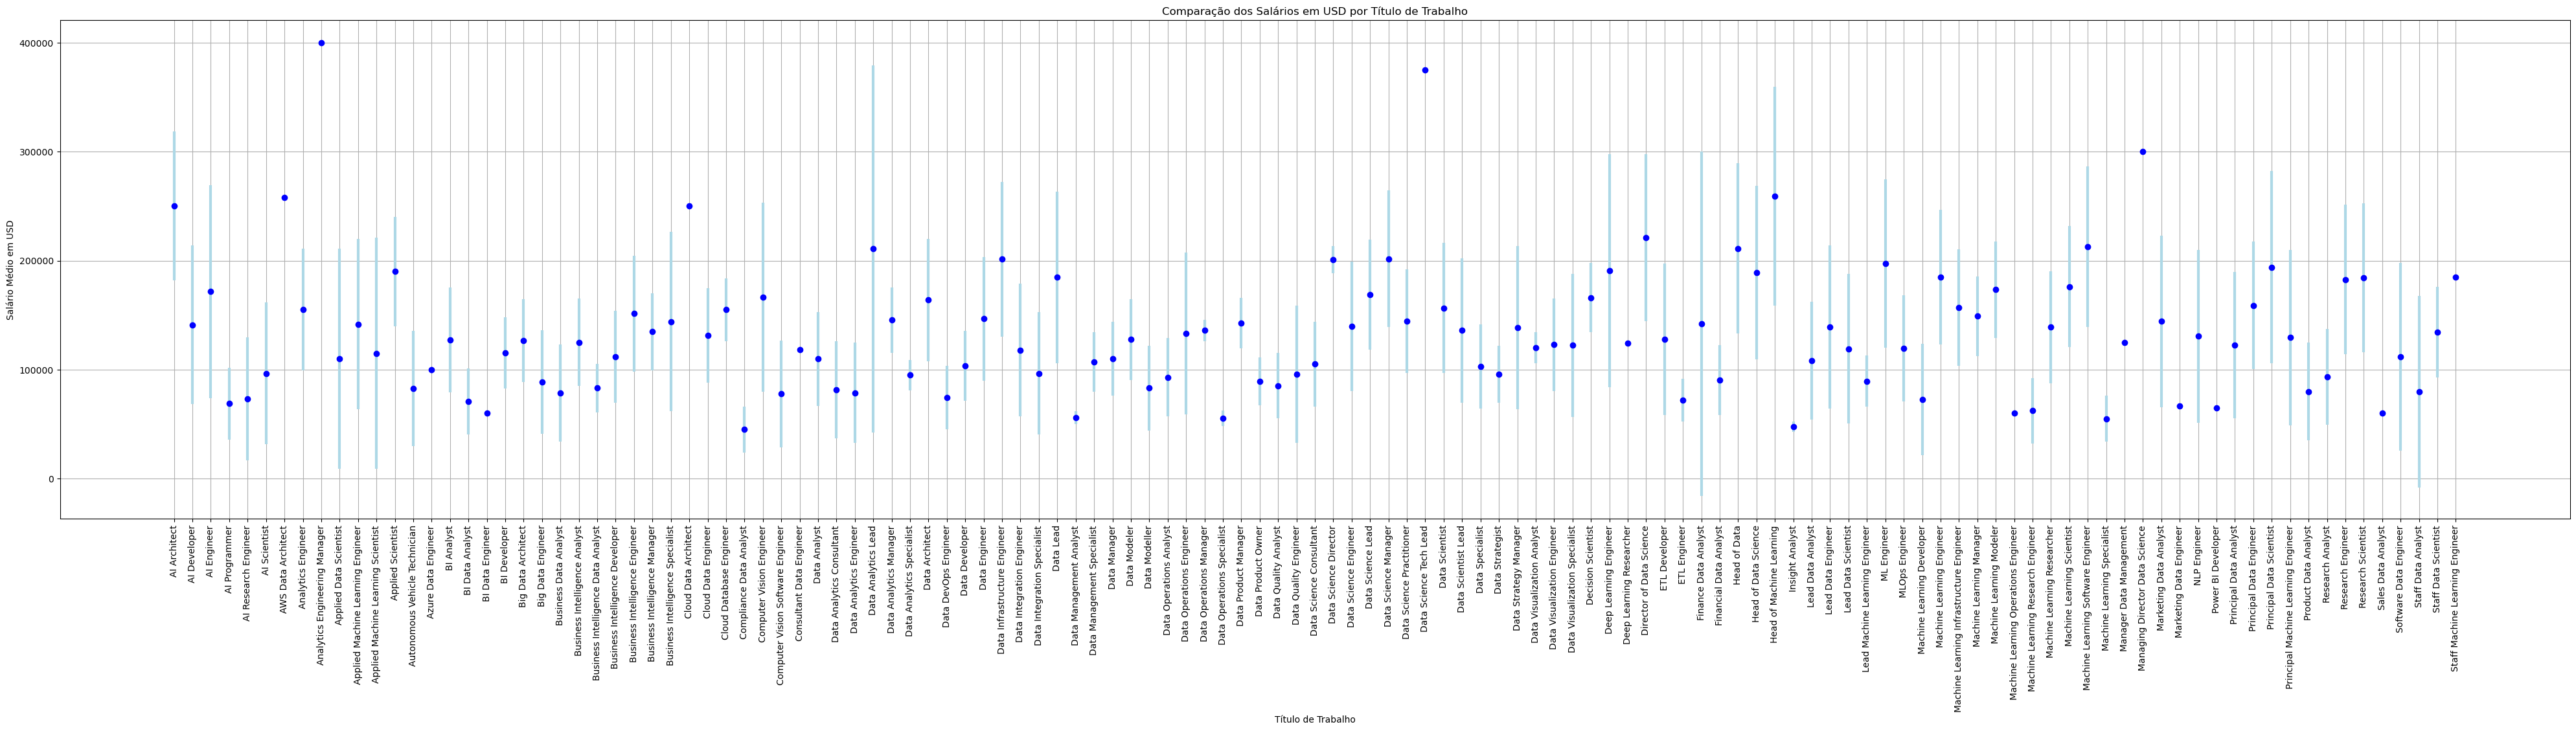

In [20]:
# Criando um gráfico de barras de erro para comparar os salários em USD por job_title

# Calculando a média e o desvio padrão dos salários para cada job_title
mean_salaries = data.groupby('job_title')['salary_in_usd'].mean()
std_salaries = data.groupby('job_title')['salary_in_usd'].std()

# Plotando o gráfico
plt.figure(figsize=(50, 10))
plt.errorbar(mean_salaries.index, mean_salaries, yerr=std_salaries, fmt='o', color='b', ecolor='lightblue', elinewidth=3, capsize=0)

plt.xticks(rotation=90)
plt.title('Comparação dos Salários em USD por Título de Trabalho')
plt.xlabel('Título de Trabalho')
plt.ylabel('Salário Médio em USD')
plt.grid(True)
plt.show()


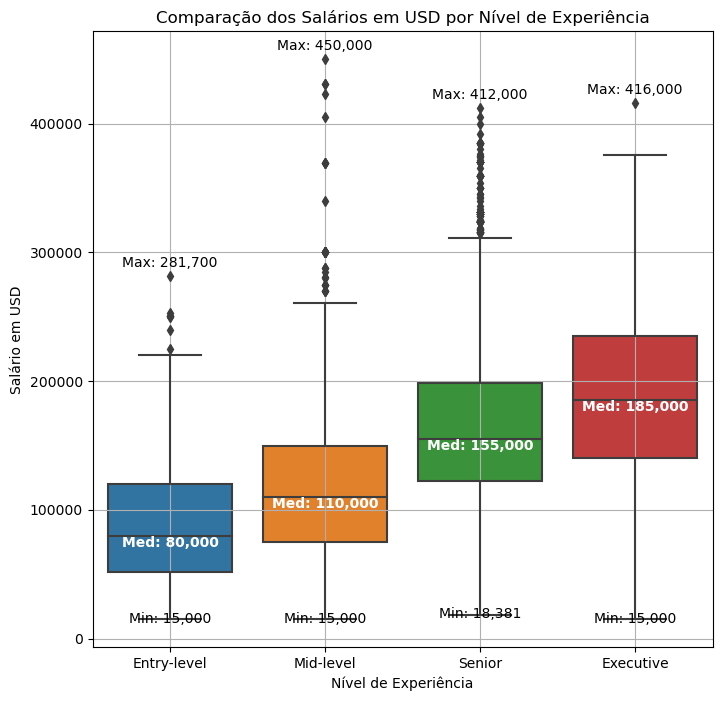

In [29]:
# Definindo a ordem dos níveis de experiência
correct_experience_order = ['Entry-level', 'Mid-level', 'Senior', 'Executive']

# Criando o gráfico de boxplot
plt.figure(figsize=(8, 8))
boxplot = sns.boxplot(y='salary_in_usd', x='experience_level', data=data, order=correct_experience_order)

# Iterando sobre os níveis de experiência para adicionar anotações
for i in range(len(correct_experience_order)):
    # Selecionando os dados de salário para o nível de experiência atual
    experience_level = correct_experience_order[i]
    salaries = data[data['experience_level'] == experience_level]['salary_in_usd']

    # Calculando mediana, mínimo e máximo
    median = salaries.median()
    min_val = salaries.min()
    max_val = salaries.max()

    # Adicionando anotações ao gráfico
    plt.text(i, median, f'Med: {int(median):,}', ha='center', va='top', fontweight='bold', color='white')
    plt.text(i, min_val - 5000, f'Min: {int(min_val):,}', ha='center', va='bottom', color='black')
    plt.text(i, max_val + 5000, f'Max: {int(max_val):,}', ha='center', va='bottom', color='black')

plt.title('Comparação dos Salários em USD por Nível de Experiência')
plt.ylabel('Salário em USD')
plt.xlabel('Nível de Experiência')
plt.grid(True)
plt.show()


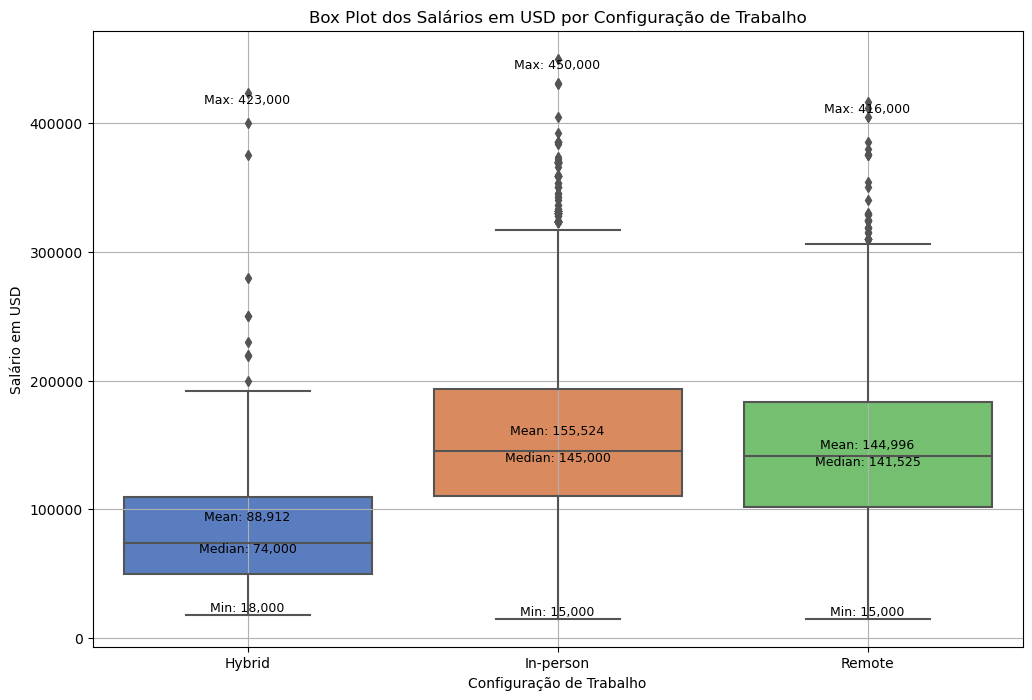

In [36]:
# Criando um gráfico de box plot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='work_setting', y='salary_in_usd', data=data, palette='muted')

# Adicionando descrições dos valores no gráfico
for i in range(len(data['work_setting'].unique())):
    # Selecionando os dados de salário para a configuração de trabalho atual
    work_setting_data = data[data['work_setting'] == ax.get_xticklabels()[i].get_text()]['salary_in_usd']

    # Calculando média, mediana, mínimo e máximo
    mean_val = work_setting_data.mean()
    median_val = work_setting_data.median()
    min_val = work_setting_data.min()
    max_val = work_setting_data.max()

    # Adicionando anotações para média, mediana, mínimo e máximo
    plt.text(i, mean_val, f'Mean: {mean_val:,.0f}', ha='center', va='bottom', color='black', fontsize=9)
    plt.text(i, median_val, f'Median: {median_val:,.0f}', ha='center', va='top', color='black', fontsize=9)
    plt.text(i, min_val, f'Min: {min_val:,.0f}', ha='center', va='bottom', color='black', fontsize=9)
    plt.text(i, max_val, f'Max: {max_val:,.0f}', ha='center', va='top', color='black', fontsize=9)

plt.title('Box Plot dos Salários em USD por Configuração de Trabalho')
plt.xlabel('Configuração de Trabalho')
plt.ylabel('Salário em USD')
plt.grid(True)
plt.show()


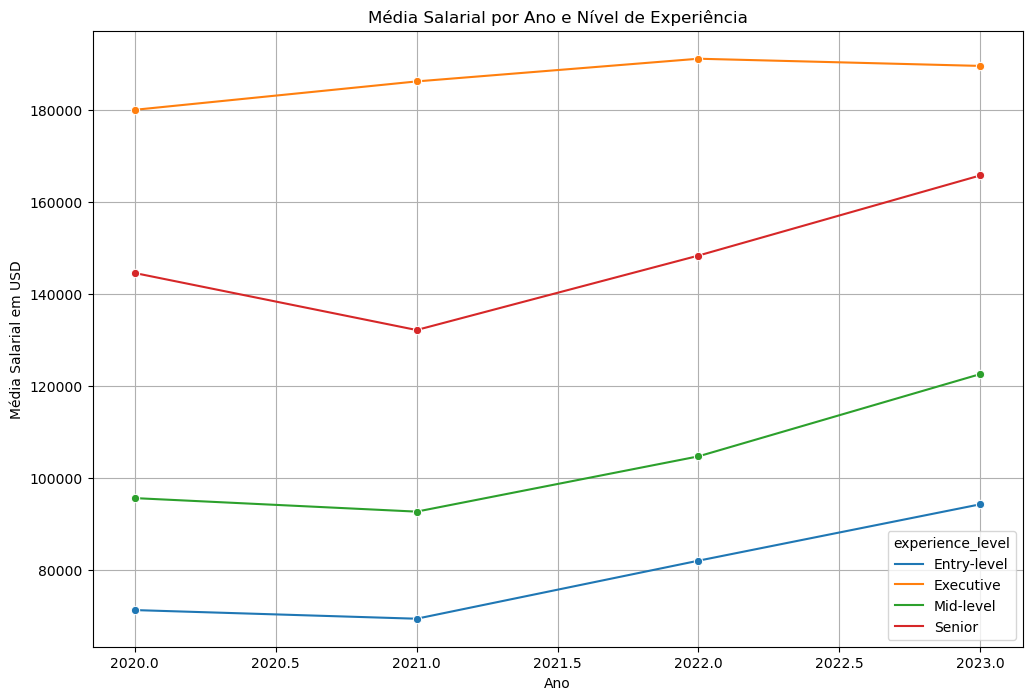

In [37]:
# Agrupando os dados por work_year e experience_level e calculando a média salarial
mean_salary_by_year_experience = data.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Criando o gráfico de linha
plt.figure(figsize=(12, 8))
sns.lineplot(data=mean_salary_by_year_experience, x='work_year', y='salary_in_usd', hue='experience_level', marker='o')

plt.title('Média Salarial por Ano e Nível de Experiência')
plt.xlabel('Ano')
plt.ylabel('Média Salarial em USD')
plt.grid(True)
plt.show()
